# Readmisión Hospitalaria

<iframe src="https://www.kaggle.com/embed/raphaelmarconato/hospital-readmission-eda-and-ml-61-49?cellIds=2&kernelSessionId=124713739" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" title="Hospital Readmission - EDA and ML (61.49%)"></iframe>

Este archivo contiene 10 años de datos de pacientes readmitidos en un hospital determinadas por varias medidas en el diagnóstico de la diabetes.

El dataset utilizado tiene 25000 valores y 14 columnas. Aquí usaremos el archivo **`hospital_readmissions.csv`** que ha sido creado para este problema.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# 1. Importar el Dataset
Cargamos el dataset usando el nombre **`df`** como variable

In [25]:
df = pd.read_csv('kaggle/input/hospital-readmissions/hospital_readmissions.csv', sep=',')

Aquí podemos ver que tenemos variables categóricas y continuas. También podemos apreciar que no hay valores nulos.

Explicación de las variables:
- **`age`:** Rango de edad del paciente.
- **`time_in_hospital`:** Tiempo de estancia en el hospital, de 1 a 14 días.
- **`n_procedures`**: Número de procedimientos realizados durante la estancía del paciente en el hospital.
- **`n_lab_procedures`**: Número de procedimientos de laboratorio realizados durante la estancía del paciente en el hospital.
- **`n_medications`**: Número de medicamentos administrados al paciente.
- **`n_outpatient`**: Número de visitas ambulatorias del paciente antes de la estancia en el hospital.
- **`n_inpatient`**: Número de visitas de pacientes hospitalizados antes de la estancia en el hospital.
- **`n_emergency`**: Número de visitas de emergencia del paciente antes de la estancia en el hospital.
- **`medical_specialty`**: Especialidad médica del médico que atendió al paciente.
- **`diag_1`**: Primer diagnóstico del paciente (Circulatoria, Respiratorio, Digestivo, etc.).
- **`diag_2`**: Segundo diagnóstico del paciente.	
- **`diag_3`**: Diagnóstico adicional del paciente.
- **`glucose_test`**: Comprobación de los niveles de glucosa en sangre del paciente, incluyen *nivel alto* (>200), *normal* o no *realizado*.
- **`A1Ctest`**: Comprobación de los niveles de A1C en sangre del paciente, incluyen *nivel alto* (>7%), *normal* o no *realizado*.
- **`change`**: Cambio en la medicación del paciente, incluyen *si* o *no*.
- **`diabetes_med`**: Medicación para la diabetes del paciente, incluyen *si* o *no*.
- **`readmitted`**: Variable objetivo, indica si el paciente fue readmitido en el hospital o no.

In [26]:
df.head(5)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [28]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [29]:
df.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [30]:
(df.isnull().sum()/len(df))

age                  0.0
time_in_hospital     0.0
n_lab_procedures     0.0
n_procedures         0.0
n_medications        0.0
n_outpatient         0.0
n_inpatient          0.0
n_emergency          0.0
medical_specialty    0.0
diag_1               0.0
diag_2               0.0
diag_3               0.0
glucose_test         0.0
A1Ctest              0.0
change               0.0
diabetes_med         0.0
readmitted           0.0
dtype: float64

# 2. Análisis Exploratorio de Datos (EDA)

Comprobamos la correlación entre nuestras variables.
- Podemos ver que no hay una correlación fuerte entre las variables.

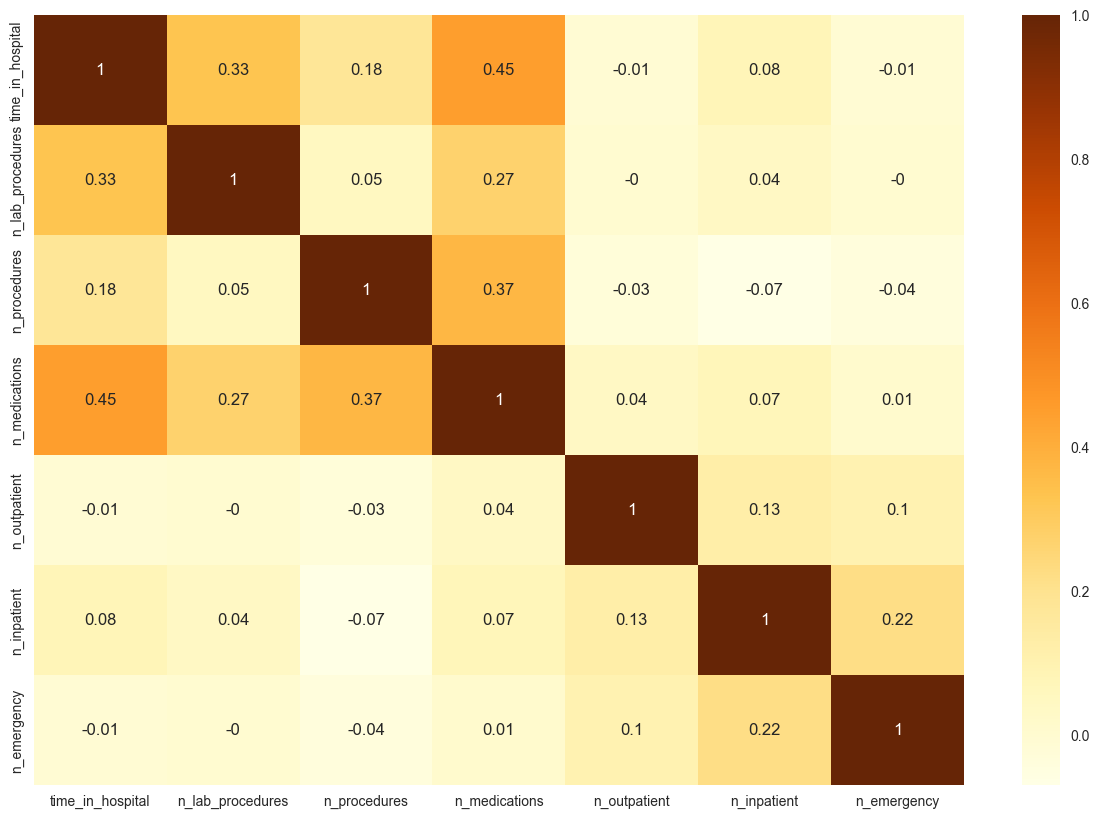

In [31]:
# Excluir las columnas no numéricas del cálculo de la correlación
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la correlación
corr = df_numeric.corr().round(2)

# Graficar la matriz de correlación
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="YlOrBr")
plt.show()

**Variables Categóricas**

Si comprobamos nuestras variables categóricas, podemos ver que tenemos algunos valores predominantes en nuestra base de datos, mirando la variable **`n_procedures`** podemos ver que cuanto mayor es el número, menos es la cantidad de datos. Cuando comprobamos la variable **`medical_specialty`** podemmos ver que tenemos mucha pérdida de información. Y cuando revisamos las variables podemos ver diferentes diagnósticos en los 3 valores.

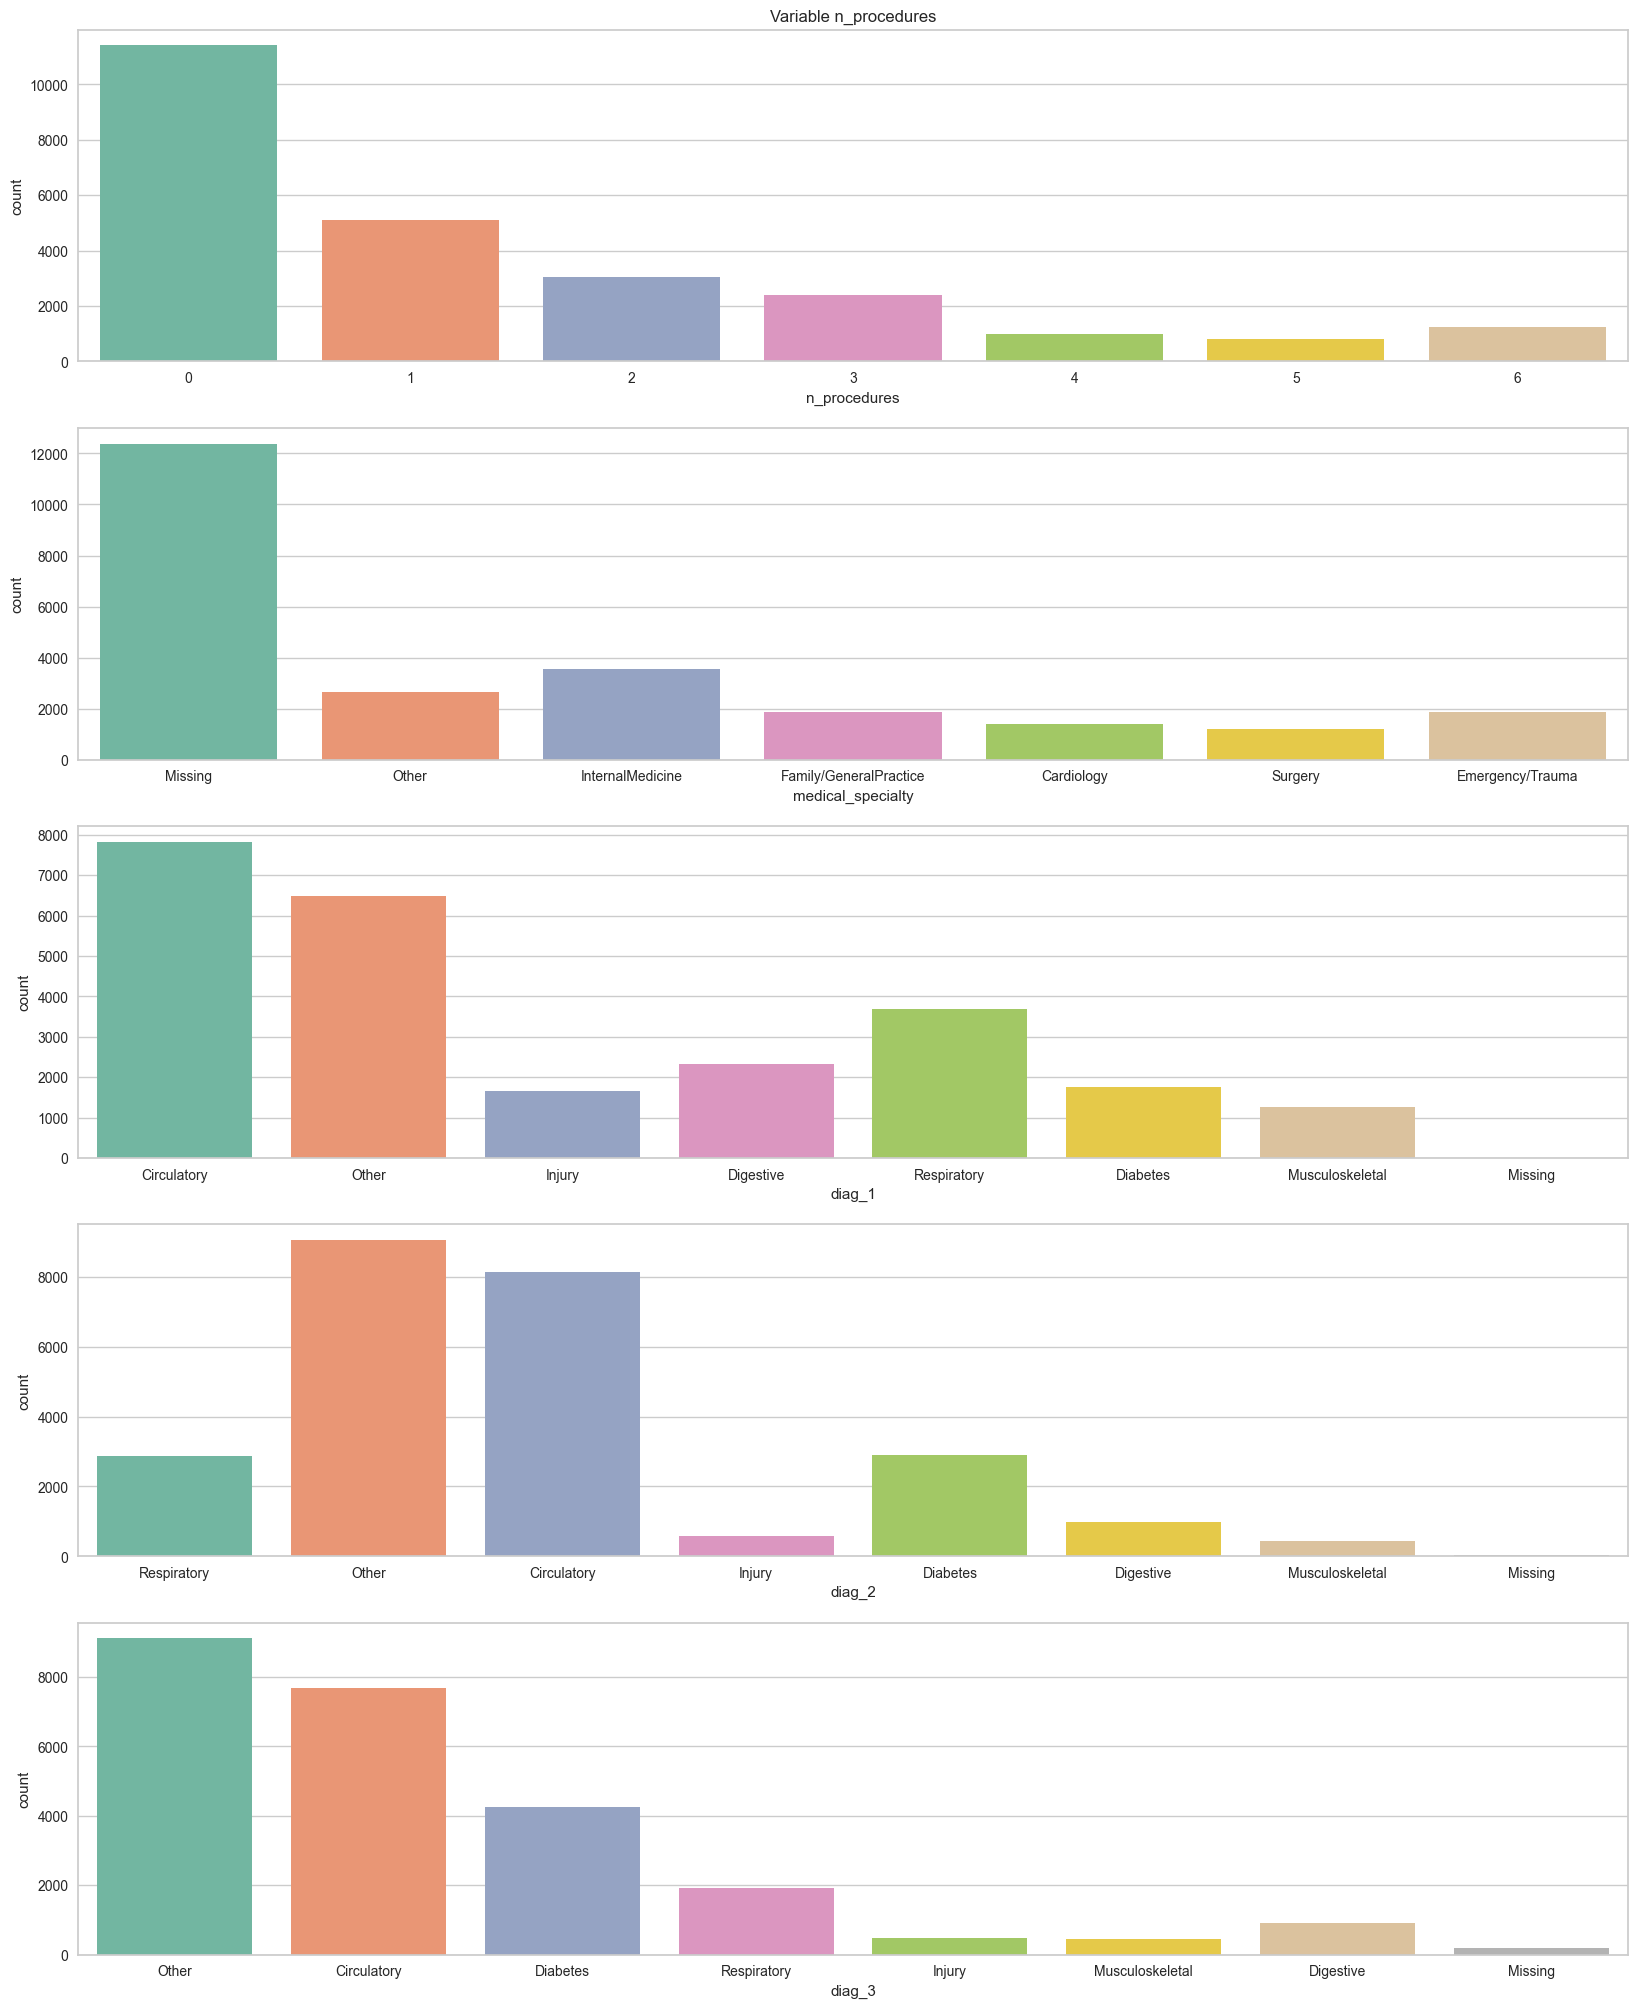

In [33]:
plt.figure(figsize=(20,25))

plt.subplot(5,1,1)
plt.gca().set_title("Variable n_procedures")
sns.countplot(x="n_procedures", palette="Set2", data=df)

plt.subplot(5,1,2)
sns.countplot(x="medical_specialty", palette="Set2", data=df)

plt.subplot(5,1,3)
sns.countplot(x="diag_1", palette="Set2", data=df)

plt.subplot(5,1,4)
sns.countplot(x="diag_2", palette="Set2", data=df)

plt.subplot(5,1,5)
sns.countplot(x="diag_3", palette="Set2", data=df)
plt.show()

Si revisamos la variable de edad, podemos ver que la mayoría de los pacientes son personas mayores, mirando la glucosa, podemos ver que a muchos no se les ha realizado la prueba. Lo mismo ocurre con la prueba de A1C, mirando en nuestra variable objetivo podemos ver que la base está bien distribuida entre los dos datos.

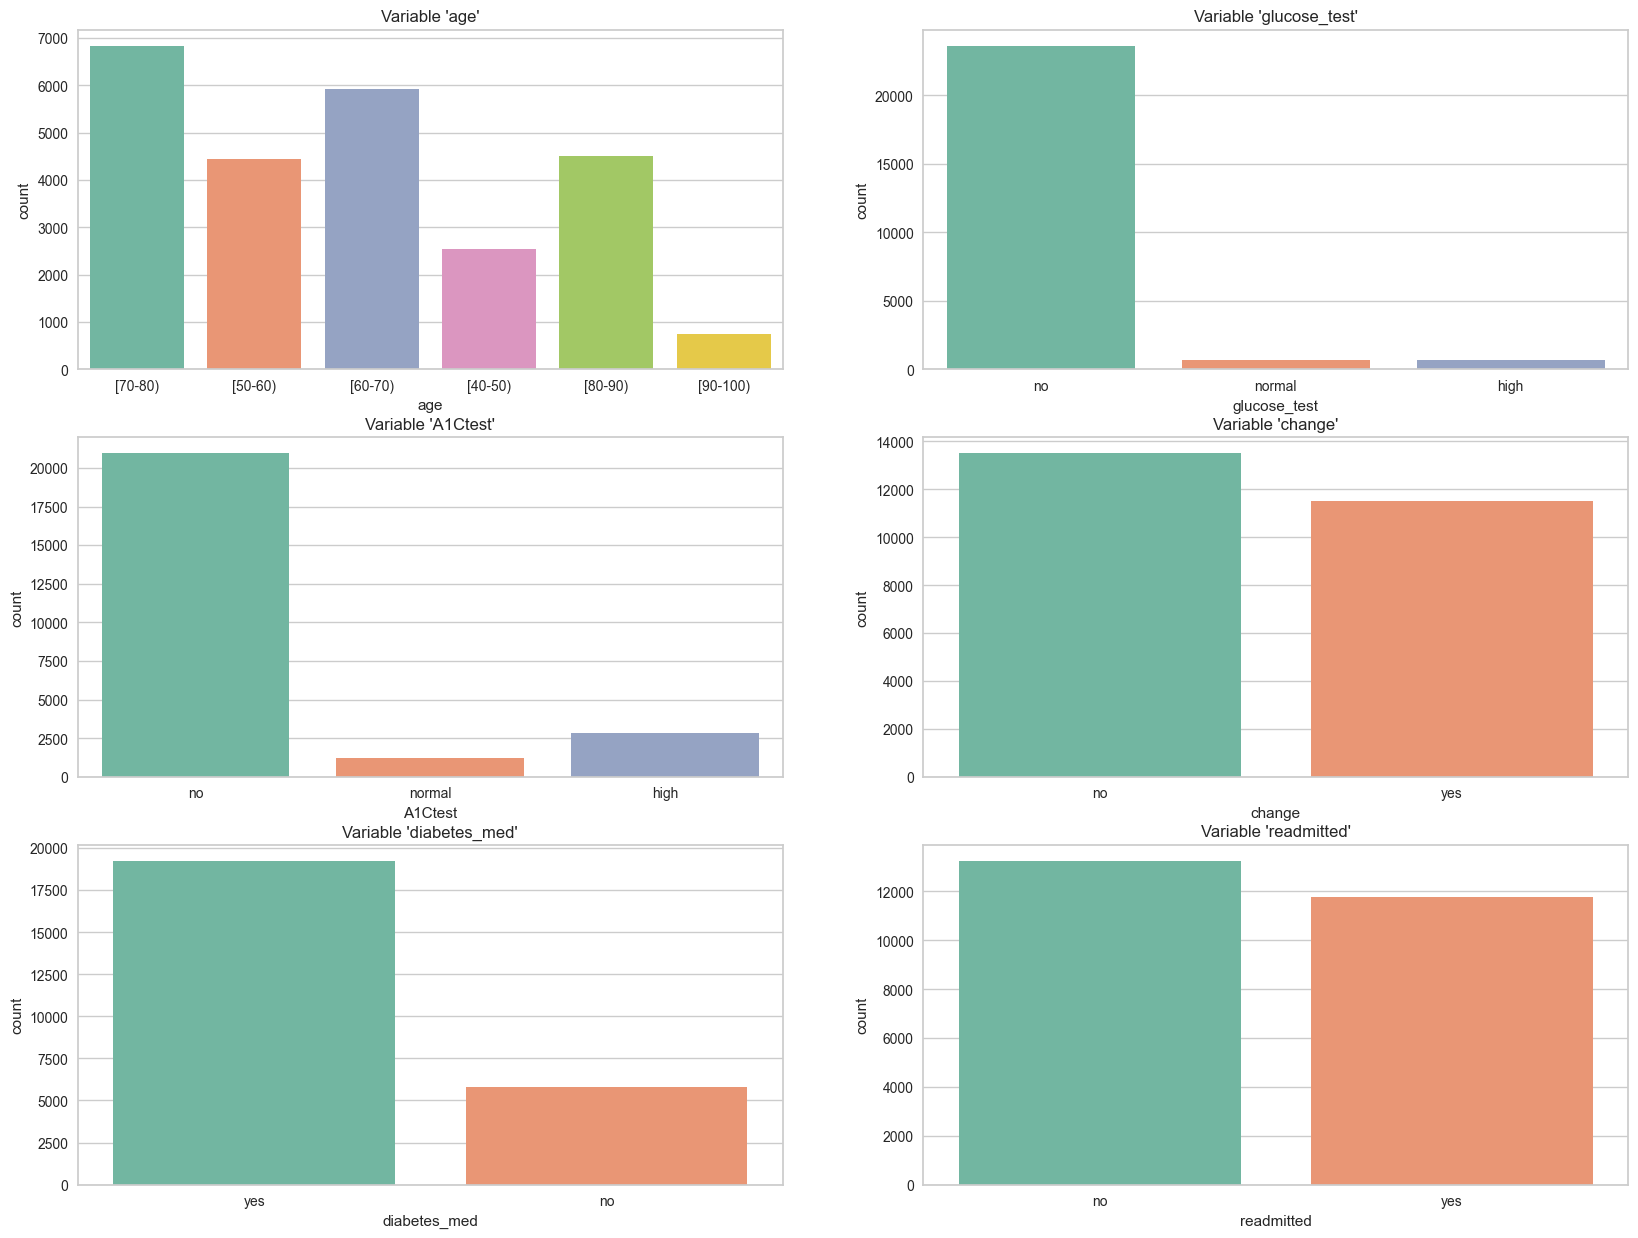

In [35]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.gca().set_title("Variable 'age'")
sns.countplot(x='age', palette='Set2', data=df)

plt.subplot(3,2,2)
plt.gca().set_title("Variable 'glucose_test'")
sns.countplot(x='glucose_test', palette='Set2', data=df)

plt.subplot(3,2,3)
plt.gca().set_title("Variable 'A1Ctest'")
sns.countplot(x='A1Ctest', palette='Set2', data=df)

plt.subplot(3,2,4)
plt.gca().set_title("Variable 'change'")
sns.countplot(x='change', palette='Set2', data=df)

plt.subplot(3,2,5)
plt.gca().set_title("Variable 'diabetes_med'")
sns.countplot(x='diabetes_med', palette='Set2', data=df)

plt.subplot(3,2,6)
plt.gca().set_title("Variable 'readmitted'")
sns.countplot(x='readmitted', palette='Set2', data=df)
plt.show()

**Variables Continuas**

Si comprobamos nuestras variables continuas, podemos ver que la mayoría de los pacientes pasan menos de 3 días en el hospital. La mayoría de los pacientes tienen menos de 10 procedimientos de laboratorio y menos de 20 medicamentos. La mayoría de los pacientes tienen menos de 10 visitas ambulatorias y menos de 5 visitas de emergencia.

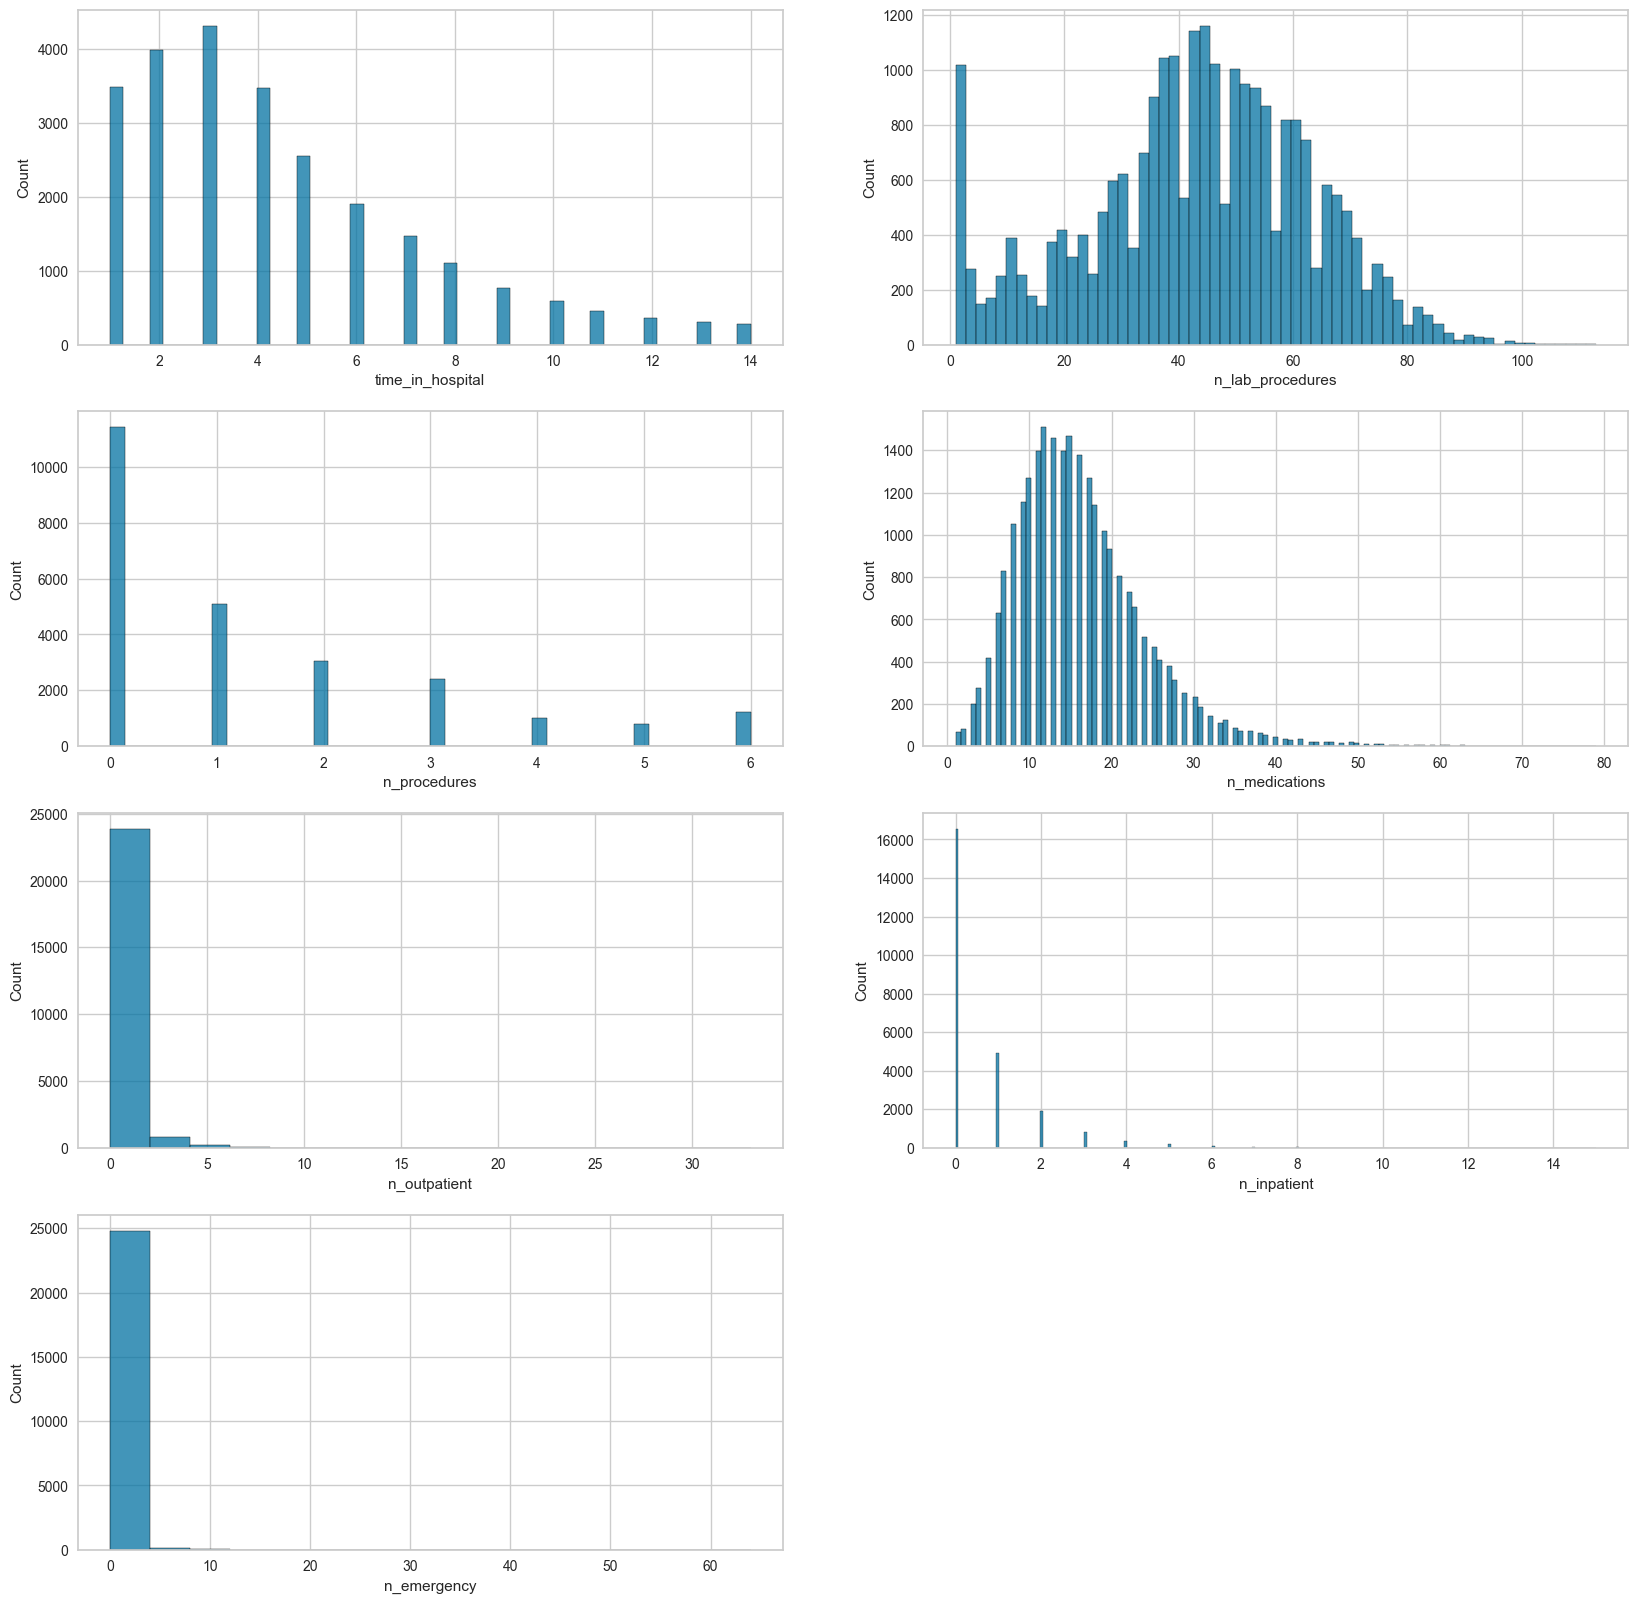

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.histplot(x = df['time_in_hospital'], kde=False)

plt.subplot(4,2,2)
sns.histplot(x = df['n_lab_procedures'], kde=False)

plt.subplot(4,2,3)
sns.histplot(x = df['n_procedures'], kde=False)

plt.subplot(4,2,4)
sns.histplot(x = df['n_medications'], kde=False)

plt.subplot(4,2,5)
sns.histplot(x = df['n_outpatient'], kde=False)

plt.subplot(4,2,6)
sns.histplot(x = df['n_inpatient'], kde=False)

plt.subplot(4,2,7)
sns.histplot(x = df['n_emergency'], kde=False)
plt.show()

Si comprobamos los diagramas de cajas, podemos ver que tenemos algunos outliers, pero de momento vamos a dejarlos.

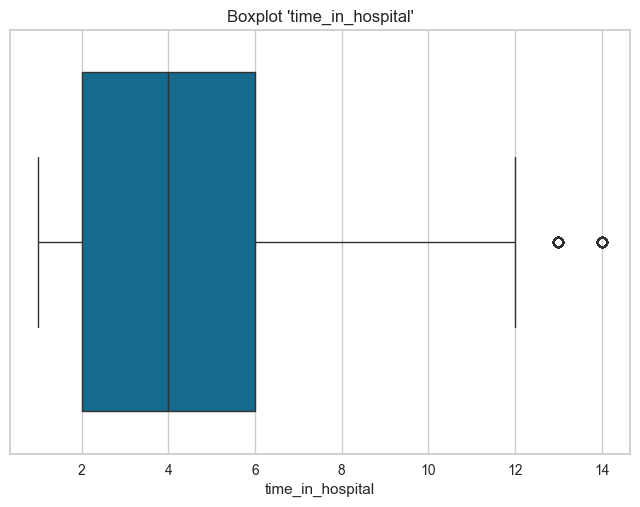

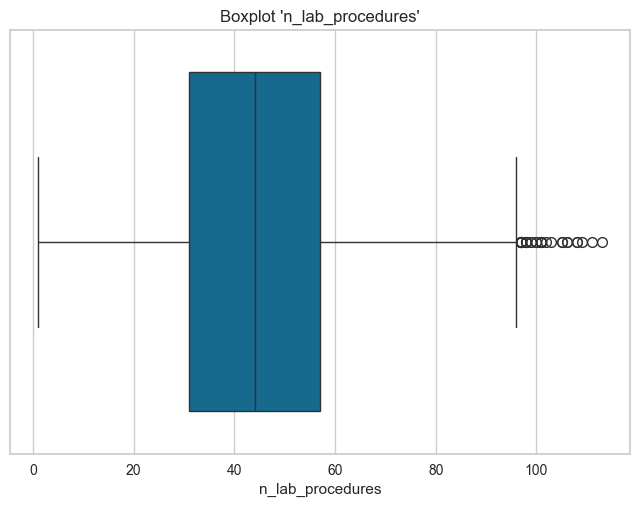

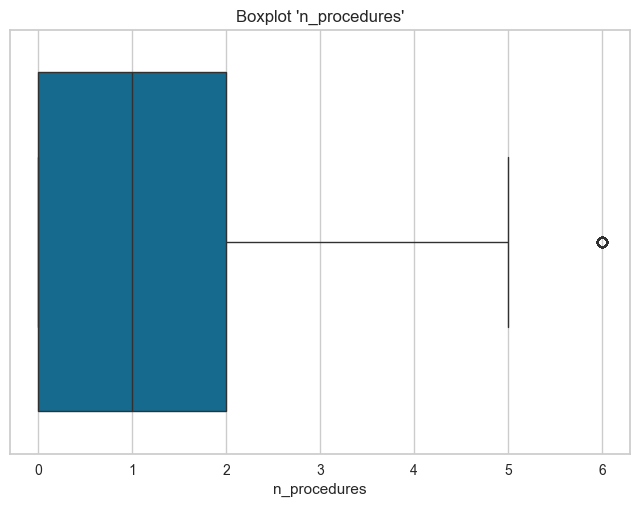

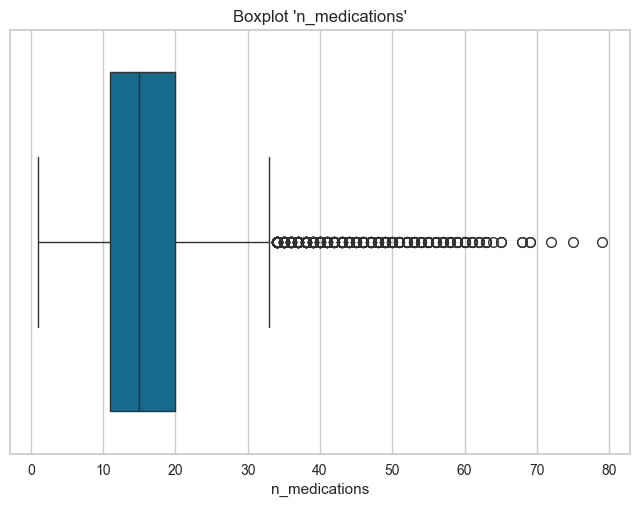

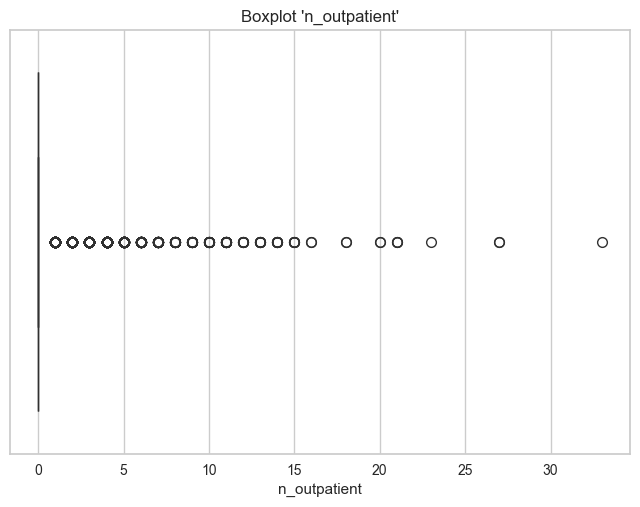

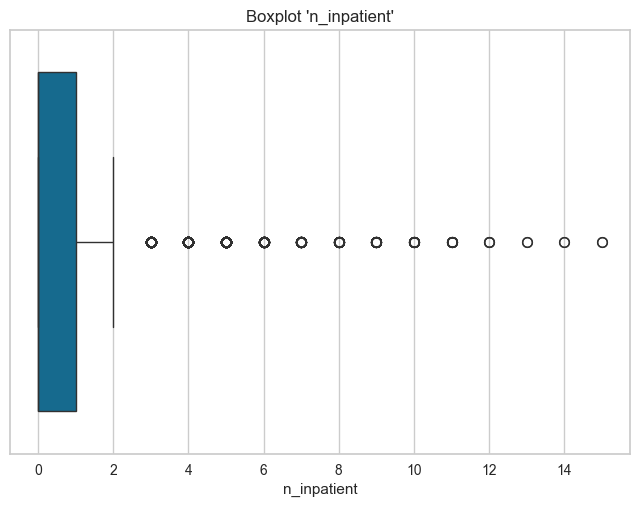

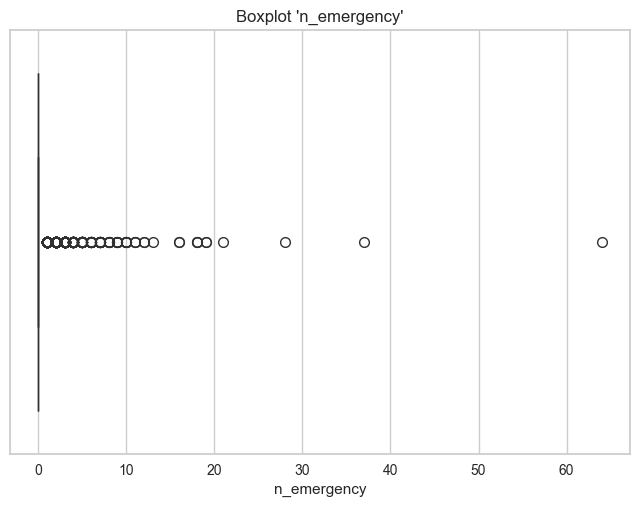

In [38]:
variables = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

for val in variables:
    plt.figure()
    plt.title(f"Boxplot '{val}'")
    sns.boxplot(x=df[val])
    plt.show()